In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinasLE_Arb as ru

from scipy.interpolate import interp1d
from scipy.integrate import quad, solve_ivp

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# Resolución de ecuaciones del fondo
nodos, ell = 0, 2

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.10179680808153946 radio 23.18182101984913
masa  -11.037586744763619 Uf  -0.47613113462108214

E(U(inf))  -0.2408025879999024
energía =  -0.6770158744836592 $\lambda = $ 0.4529975350109142

Checking normalización,  1.0000000003439213 1


checking  -1.6495944315174458 11.037587739760035 0.01232096267039339 -0.6770158689545379

Plot shooting y extensión


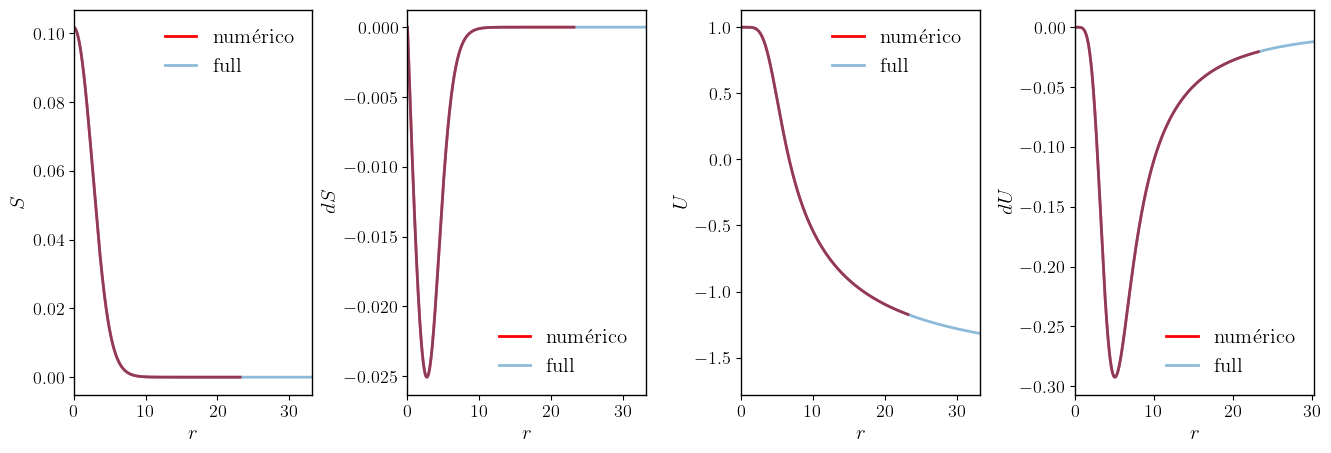

Checking normalización, 1.000000008484075 1
Checking convergencia de la Energía U(inf), U(asint) -0.6763707056609007 -0.6770158744836592

Plot extensión normalizada y interpolación


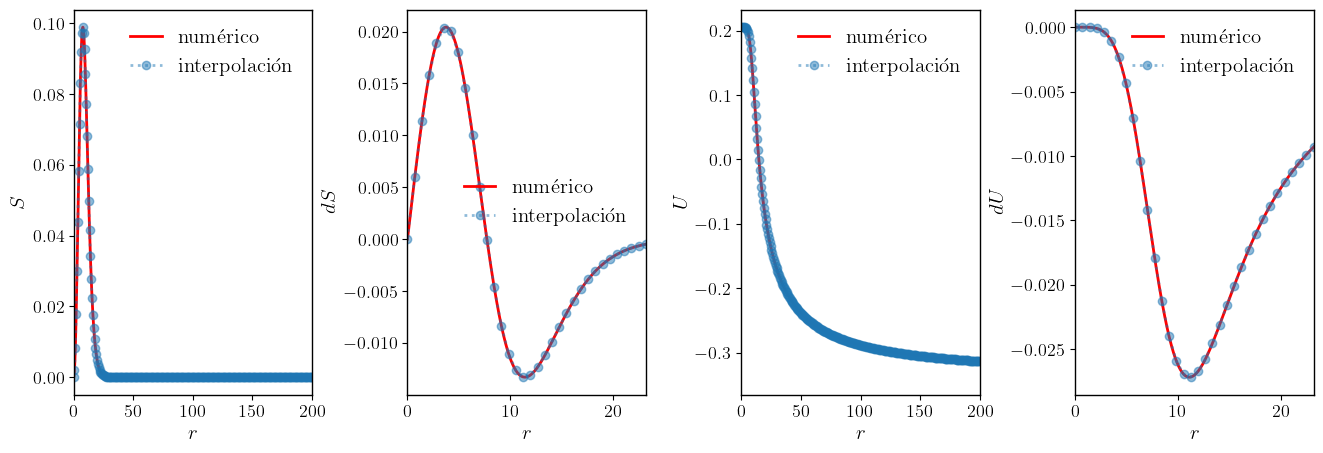

In [5]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.4))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.4))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [6]:
# Calculando los autovalores (Espectro)
Jval = range(0, 3)  # momento angular de la perturbación 

rMax = 200*(nodos+1) 
Nptos = int(3*rMax/4) + 200

datFunc = [fsN, fuN]

# cada fila es un valor de Nptos y columna J
Auto_Valores, Auto_Funciones = [], []
for J in Jval:
    util = [ell, J, Nptos, rMax]
    lambd, _, Vecto_Full, _ = ru.espectro(datFunc, util)

    #### Separando los Autovalores ######
    jj = np.real(lambd)!=0  # reales
    autoval_Real = lambd[jj]
    print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, Nptos), autoval_Real)
    
    if len(autoval_Real)!=0:
        temp = len(autoval_Real)
        name = 'data_l%d_J%d.dat'%(ell, J)
        data = np.array([[J]*temp, autoval_Real.real, autoval_Real.imag]).T
        np.savetxt(name, data)
    ###############

    ###### Organizando de menor a mayor los autovalores #####
    indF = ru.menor(lambd).astype(int)
    autova_Organ = lambd[indF]

    ###### Salvando  #####
    Auto_Valores.append(autova_Organ)
    Auto_Funciones.append(Vecto_Full[:, indF])

Autovalores con part. Real para J=0, Npt.=350 ->  []
Autovalores con part. Real para J=1, Npt.=350 ->  []
Autovalores con part. Real para J=2, Npt.=350 ->  [-6.44373293e-03-6.42923213e-13j -4.32121042e-07-1.86101328e-15j
  4.32121042e-07-1.86101328e-15j  6.44373293e-03-6.42923213e-13j]


In [7]:
autDat = 10  # numero de autovalores que se mostrarán
k = 0
for J in Jval:
    print('Autovalores para J -> %d'%J)
    print('') 
    print(Auto_Valores[k][:autDat])
    print('')
    k += 1

Autovalores para J -> 0

[-0.-8.76630120e-06j  0.+8.76630122e-06j  0.+6.40869494e-02j
 -0.-6.40869494e-02j -0.-1.65759053e-01j  0.+1.65759053e-01j
  0.+2.12335564e-01j -0.-2.12335564e-01j  0.+2.41939668e-01j
 -0.-2.41939668e-01j]

Autovalores para J -> 1

[ 0.+0.00111802j -0.-0.00111802j -0.-0.05842642j  0.+0.05842642j
 -0.-0.07777395j  0.+0.07777395j  0.+0.13476859j -0.-0.13476859j
  0.+0.14151232j -0.-0.14151232j]

Autovalores para J -> 2

[-4.32121042e-07-1.86101328e-15j  4.32121042e-07-1.86101328e-15j
 -6.44373293e-03-6.42923213e-13j  6.44373293e-03-6.42923213e-13j
  0.00000000e+00+1.02379351e-01j -0.00000000e+00-1.02379351e-01j
 -0.00000000e+00-1.05863348e-01j  0.00000000e+00+1.05863348e-01j
 -0.00000000e+00-1.08244706e-01j  0.00000000e+00+1.08244706e-01j]



In [8]:
J = 2
autoV = 2
utilez = [ell, Nptos, rMax]
c1, Lval, r_dis, datA, datB = ru.VectoresAB(J, autoV, Auto_Funciones, Auto_Valores, utilez)

Número de L  3  ->  [0 2 4]
Autovalor estudiado  (-0.006443732933821609-6.429232125489419e-13j)


Text(2.8, 0.06, '$\\lambda=-0.00644373 \\times 1/t_c$')

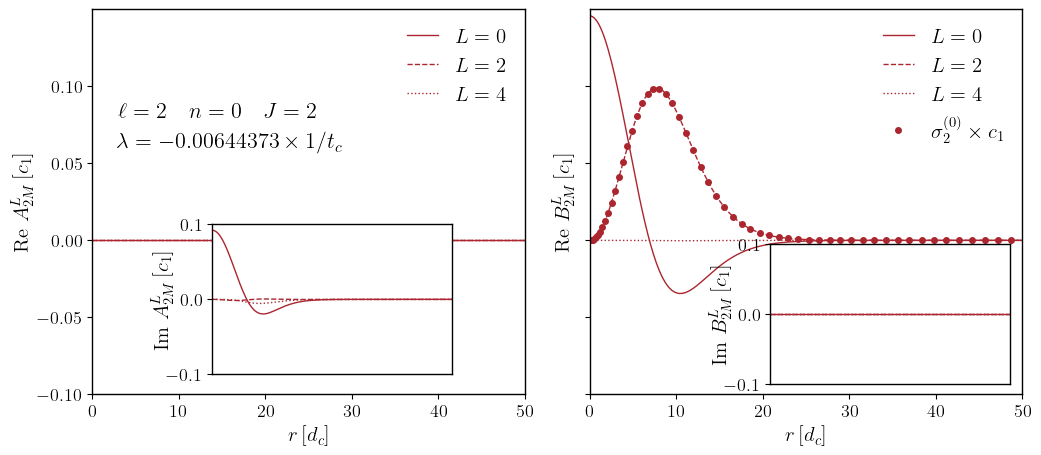

In [9]:
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.15))

left, bottom, width, height = [0.225, 0.15, 0.2, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.69, 0.13, 0.2, 0.28]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1):
    ax[0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])

ax[1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

ax[0].set_xlabel(r'$r \, [d_c]$')
ax[1].set_xlabel(r'$r \, [d_c]$')
ax[0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)

ax[0].set_xlim(0, 50)
ax[1].set_xlim(0, 50)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 50)

ax[0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax2.set_xticks([])

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

ax[0].text(x=3, y= 0.08, s=r'$\ell=%d \quad n=%d \quad J=%d$'%(ell, nodos, J))
ax[0].text(x=2.8, y= 0.06, s=r'$\lambda=%9.8f \times 1/t_c$'%np.real(Auto_Valores[J][autoV]))

In [10]:
Lmin, Lmax = abs(J-ell), J+ell
Lval = np.arange(Lmin, Lmax+1, 2, dtype=int)

JValores = Lval
rval = r_dis[1:Nptos]

X1valores0 = []
BoundY10 = []
for i in range(len(JValores)):
    datosA = datA[i]#*cte
    Jval = JValores[i]
    temp = ru.X1Val0(datosA, Jval, Nptos, fsN, rMax)

    temp2 = np.gradient(temp, rval)[1]
    
    X1valores0.append(temp)
    BoundY10.append(temp2)

X1valores = []
BoundY1 = []
temp = ru.X1Val(np.concatenate(datA), ell, J, Nptos, fsN, rMax)
for i in range(len(temp)):
    temp2 = np.gradient(temp[i], rval)[1]
    
    X1valores.append(temp[i])
    BoundY1.append(temp2)


X2valores = []
BoundY2 = []
for i in range(len(JValores)):
    datosA = datA[i]#*cte
    Jval = JValores[i]
    temp = datosA/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X2valores.append(temp)
    BoundY2.append(temp2)


X3valores = []
BoundY3 = []
for i in range(len(JValores)):
    datosB = datB[i]#*cte
    Jval = JValores[i]
    temp = datosB/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X3valores.append(temp)
    BoundY3.append(temp2)

$c_1$-values $\to$  3 check  True


(0.0, 50.0)

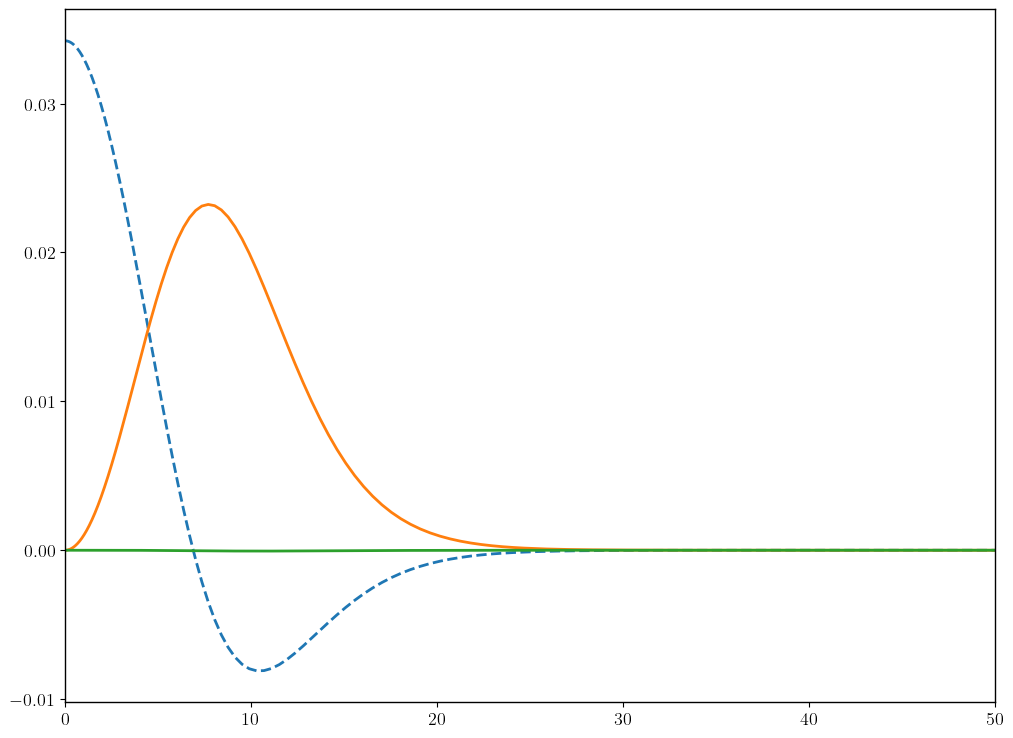

In [11]:
# Comprobando
plt.plot(rval, X3valores[0], ls='--')
plt.plot(rval, X3valores[1]*rval**2)
plt.plot(rval, X3valores[2]*rval**4)

plt.xlim(0,50)

In [12]:
### Condiciones iniciales
# Totas las derivadas son ceros

y11, y12, y13 = 0+0J, 0+0J, 0+0J # BoundY1[0], BoundY1[1], BoundY1[2]
y21, y22, y23 = 0+0J, 0+0J, 0+0J # BoundY2[0], BoundY2[1], BoundY2[2]
y31, y32, y33 = 0+0J, 0+0J, 0+0J # BoundY3[0], BoundY3[1], BoundY3[2]
#0, 0, 0, 0, 0, 0, 0, 0, 0

# x11 -> 2*trian^{-1}(sig0*r^{J-2}*A^{J−2}), x12 -> 2*trian^{-1}(sig0*r^{J}*A^{J}), x13 -> 2*trian^{-1}(sig0*r^{J+2}*A^{J+2})
# x21 -> A^{J−2}/r^{J-2}, x12 -> A^{J}/r^{J}, x13 -> A^{J+2}/r^{J+2}
# x31 -> B^{J−2}/r^{J-2}, x32 -> B^{J}/r^{J}, x33 -> B^{J+2}/r^{J+2}
JJ = 2
rval = r_dis[1:Nptos]

x11, x12, x13 = 0+0J, 0+0J, 0+0J # X1valores[0][0], X1valores[1][0], X1valores[2][0] 
x21, x22, x23 = X2valores[0][0], X2valores[1][0], X2valores[2][0]
x31, x32, x33 = X3valores[0][0], X3valores[1][0], X3valores[2][0]

In [13]:
# resolviendo
lam = Auto_Valores[J][autoV]
rmin, rmax = rval[0], rval[-1]
arg = [JJ, lam, ell, fsN, fuN]

rspan = np.linspace(rmin, rmax, 10000)

U0 = [x11, x12, x13, x21, x22, x23, x31, x32, x33, y11, y12, y13, y21, y22, y23, y31, y32, y33,]

sol_ = solve_ivp(ru.Syst, [rmin, rmax], U0, args=([arg]), t_eval=rspan,
                 method='DOP853', rtol=1e-5, atol=1e-8)  # DOP853 RK45

(-0.1, 0.15)

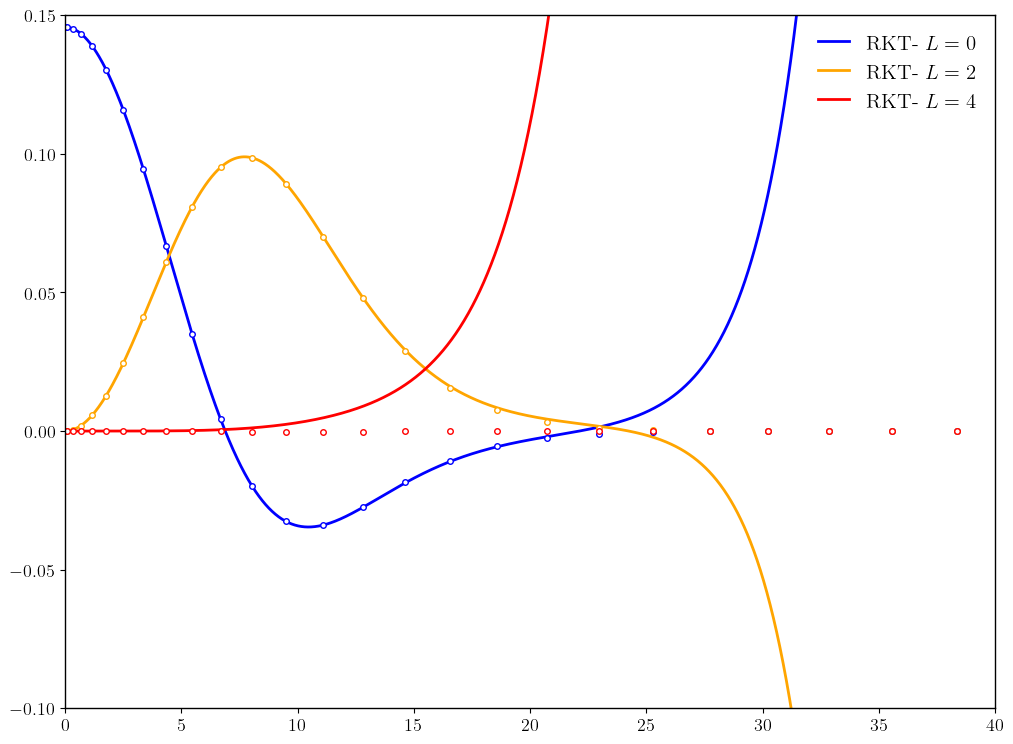

In [14]:
plt.plot(sol_.t, np.real(sol_.y[6]*cte)*sol_.t**0, '-', color = 'blue',
               label = r'RKT- $L=0$')
plt.plot(sol_.t, np.real(sol_.y[7]*cte)*sol_.t**2, '-', color = 'orange',
               label = r'RKT- $L=2$')
plt.plot(sol_.t, np.real(sol_.y[8]*cte)*sol_.t**4, '-', color = 'red',
               label = r'RKT- $L=4$')


plt.plot(r_dis[1:Nptos:4], np.real(datB[0]*cte)[::4], ls='',
         marker='o', markersize=4, c='blue', mfc='white')
plt.plot(r_dis[1:Nptos:4], np.real(datB[1]*cte)[::4], ls='',
         marker='o', markersize=4, c='orange', mfc='white')
plt.plot(r_dis[1:Nptos:4], np.real(datB[2]*cte)[::4], ls='',
         marker='o', markersize=4, c='red', mfc='white')

plt.legend(frameon=False)

plt.xlim(0, 40)
plt.ylim(-1e-01, 0.15)

In [15]:
# extrayendo datos
datosR = np.copy(sol_.t)
datosA, datosB = [], []
for i in range(len(Lval)):
    Lvalor = Lval[i]
    tempA = sol_.y[3+i]*sol_.t**Lvalor
    tempB = sol_.y[6+i]*sol_.t**Lvalor
    
    datosA.append(tempA)
    datosB.append(tempB)

In [16]:
# Resolución de ecuaciones del fondo
nodos2, ell2 = 0, 3

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell2 = ru.profiles(nodos2, ell2)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.015703066781142506 radio 23.51573873969402
masa  -14.836532209435159 Uf  -0.6309192483241634

E(U(inf))  -0.2591164824004139
energía =  -0.7991221570645615 $\lambda = $ 0.47180820296758985

Checking normalización,  1.0000000010276688 1


checking  -1.7949493831288441 14.83653748609871 0.014948991069503172 -0.7991221442060005

Plot shooting y extensión


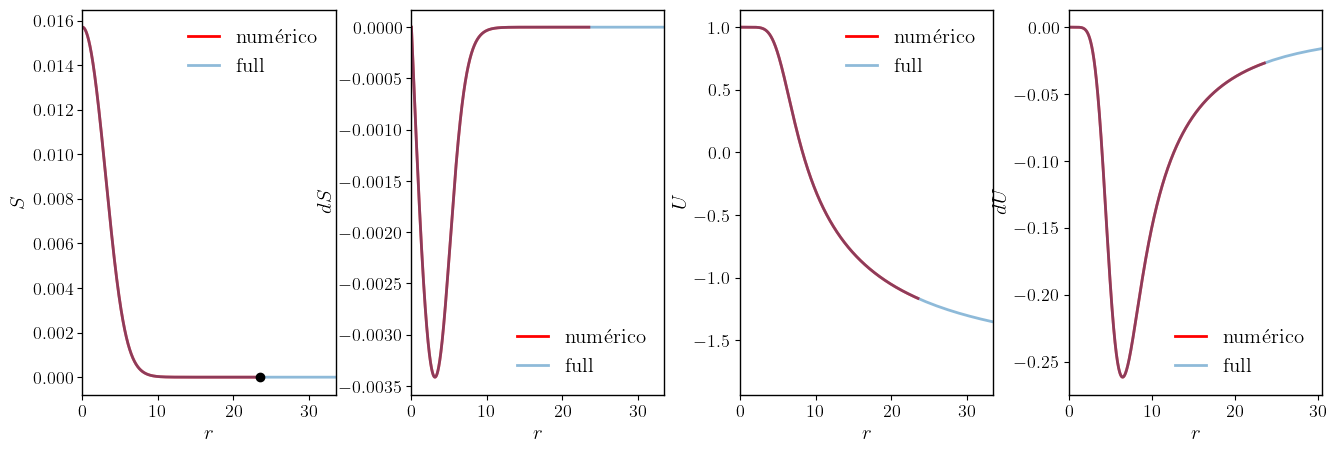

Checking normalización, 1.0000010893000082 1
Checking convergencia de la Energía U(inf), U(asint) -0.7981814555071944 -0.7991221570645615

Plot extensión normalizada y interpolación


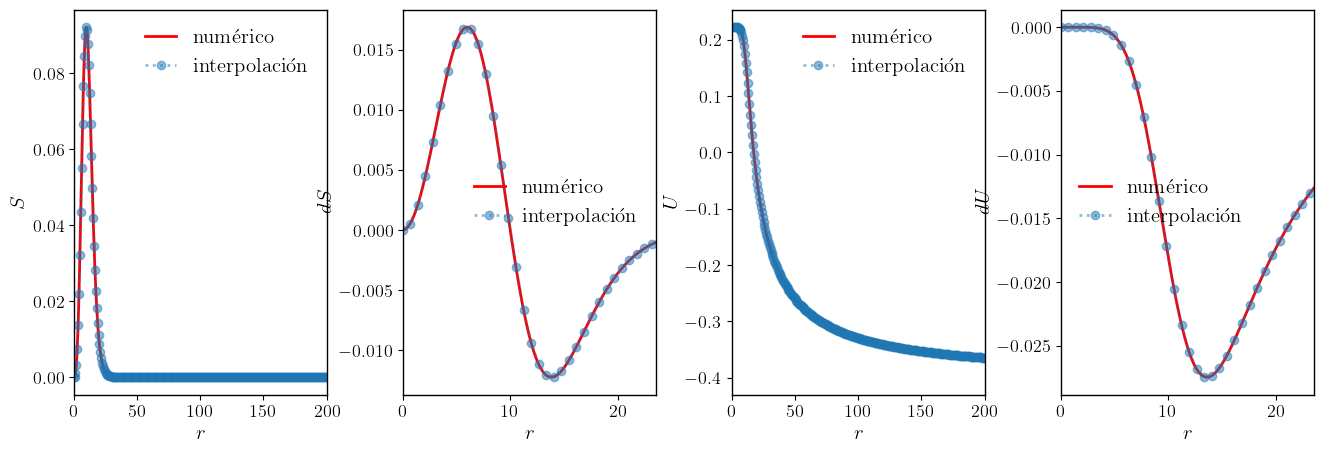

In [17]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell2, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell2*sDnew)*lam**2
dsN = rDnew**(ell2-1)*(ell2*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell2+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [18]:
# Calculando los autovalores (Espectro)
Jval2 = range(0, 4)  # momento angular de la perturbación 

rMax = 200*(nodos+1) 
Nptos = int(3*rMax/4) + 200

datFunc = [fsN, fuN]

# cada fila es un valor de Nptos y columna J
Auto_Valores2, Auto_Funciones2 = [], []
for J in Jval2:
    util = [ell2, J, Nptos, rMax]
    lambd, _, Vecto_Full, _ = ru.espectro(datFunc, util)

    #### Separando los Autovalores ######
    jj = np.real(lambd)!=0  # reales
    autoval_Real = lambd[jj]
    print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, Nptos), autoval_Real)
    
    if len(autoval_Real)!=0:
        temp = len(autoval_Real)
        name = 'data_l%d_J%d.dat'%(ell2, J)
        data = np.array([[J]*temp, autoval_Real.real, autoval_Real.imag]).T
        np.savetxt(name, data)
    ###############

    ###### Organizando de menor a mayor los autovalores #####
    indF = ru.menor(lambd).astype(int)
    autova_Organ = lambd[indF]

    ###### Salvando  #####
    Auto_Valores2.append(autova_Organ)
    Auto_Funciones2.append(Vecto_Full[:, indF])

Autovalores con part. Real para J=0, Npt.=350 ->  []
Autovalores con part. Real para J=1, Npt.=350 ->  []
Autovalores con part. Real para J=2, Npt.=350 ->  [-9.07756076e-03-1.24406434e-12j -7.99288996e-07+1.67355680e-14j
  7.99288996e-07+1.67355680e-14j  9.07756076e-03-1.24406434e-12j]
Autovalores con part. Real para J=3, Npt.=350 ->  [-0.0036356 +0.05313153j -0.0036356 -0.05313153j -0.00085739-0.05953874j
 -0.00085739+0.05953874j  0.00085739+0.05953874j  0.00085739-0.05953874j
  0.0036356 -0.05313153j  0.0036356 +0.05313153j]


In [19]:
autDat = 10  # numero de autovalores que se mostrarán
k = 0
for J in Jval2:
    print('Autovalores para J -> %d'%J)
    print('') 
    print(Auto_Valores2[k][:autDat])
    print('')
    k += 1

Autovalores para J -> 0

[-0.-1.63742126e-05j  0.+1.63742126e-05j  0.+5.90358728e-02j
 -0.-5.90358728e-02j  0.+1.68274683e-01j -0.-1.68274683e-01j
  0.+2.21897071e-01j -0.-2.21897071e-01j  0.+2.58244807e-01j
 -0.-2.58244807e-01j]

Autovalores para J -> 1

[ 0.+0.00132286j -0.-0.00132286j  0.+0.05925506j -0.-0.05925506j
 -0.-0.06609698j  0.+0.06609698j  0.+0.13286702j -0.-0.13286702j
 -0.-0.14085118j  0.+0.14085118j]

Autovalores para J -> 2

[-7.99288996e-07+1.67355680e-14j  7.99288996e-07+1.67355680e-14j
 -9.07756076e-03-1.24406434e-12j  9.07756076e-03-1.24406434e-12j
 -0.00000000e+00-9.95476881e-02j  0.00000000e+00+9.95476881e-02j
  0.00000000e+00+1.01381837e-01j -0.00000000e+00-1.01381837e-01j
 -0.00000000e+00-1.05877961e-01j  0.00000000e+00+1.05877961e-01j]

Autovalores para J -> 3

[-0.0036356 -0.05313153j  0.0036356 -0.05313153j -0.0036356 +0.05313153j
  0.0036356 +0.05313153j  0.        +0.0591j     -0.        -0.0591j
 -0.00085739+0.05953874j  0.00085739+0.05953874j -0.00085739

In [20]:
J = 2
autoV = 1
utilez = [ell2, Nptos, rMax]
c12, Lval2, r_dis2, datA2, datB2 = ru.VectoresAB(J, autoV, Auto_Funciones2, Auto_Valores2, utilez)

Número de L  3  ->  [1 3 5]
Autovalor estudiado  (7.992889961044986e-07+1.67355679793971e-14j)


Text(2.8, 0.06, '$\\lambda=0.00000080 + 0.00000000 \\times 1/t_c$')

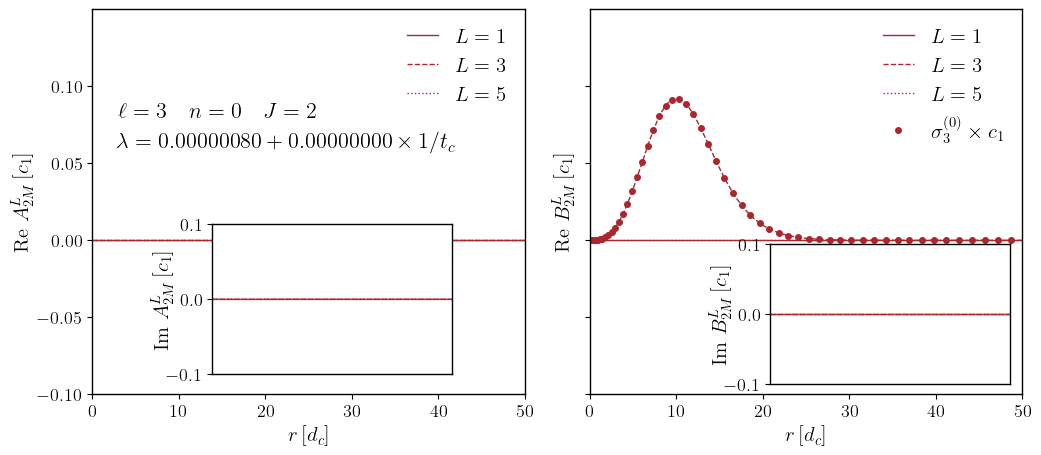

In [21]:
ellPos = 1
cte2 = -fsN(r_dis2[1:Nptos]).max()/np.abs(datB2[ellPos]).max()

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Ls = ['-', '--', ':', '-.']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.15))

left, bottom, width, height = [0.225, 0.15, 0.2, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.69, 0.13, 0.2, 0.28]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c12):
    ax[0].plot(r_dis2[1:Nptos], np.real(datA2[i]*cte2), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval2[i]), c=col[3])
    ax1.plot(r_dis2[1:Nptos], np.imag(datA2[i]*cte2),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1].plot(r_dis2[1:Nptos], np.real(datB2[i]*cte2), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval2[i]), c=col[3])
    ax2.plot(r_dis2[1:Nptos], np.imag(datB2[i]*cte2), ls=Ls[i], lw=1, 
             c=col[3])

ax[1].plot(r_dis2[1:Nptos][::2], fsN(r_dis2[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell2)

ax[0].set_xlabel(r'$r \, [d_c]$')
ax[1].set_xlabel(r'$r \, [d_c]$')
ax[0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)

ax[0].set_xlim(0, 50)
ax[1].set_xlim(0, 50)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 50)

ax[0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax2.set_xticks([])

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

ax[0].text(x=3, y= 0.08, s=r'$\ell=%d \quad n=%d \quad J=%d$'%(ell2, nodos, J))
ax[0].text(x=2.8, y= 0.06, s=r'$\lambda=%9.8f + %9.8f \times 1/t_c$'%(np.real(Auto_Valores2[J][autoV]),
                                                                      np.imag(Auto_Valores2[J][autoV])))

In [22]:
Lmin, Lmax = abs(J-ell2), J+ell2
#Lval = np.arange(Lmin, Lmax+1, 2, dtype=int)

JValores = Lval2
rval = r_dis2[1:Nptos]

X1valores0 = []
BoundY10 = []
for i in range(len(JValores)):
    datosAtemp = datA2[i]#*cte
    Jval = JValores[i]
    temp = ru.X1Val0(datosAtemp, Jval, Nptos, fsN, rMax)

    temp2 = np.gradient(temp, rval)[1]
    
    X1valores0.append(temp)
    BoundY10.append(temp2)

X1valores = []
BoundY1 = []
temp = ru.X1Val(np.concatenate(datA2), ell2, J, Nptos, fsN, rMax)
for i in range(len(temp)):
    temp2 = np.gradient(temp[i], rval)[1]
    
    X1valores.append(temp[i])
    BoundY1.append(temp2)


X2valores = []
BoundY2 = []
for i in range(len(JValores)):
    datosAtemp = datA2[i]#*cte
    Jval = JValores[i]
    temp = datosAtemp/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X2valores.append(temp)
    BoundY2.append(temp2)


X3valores = []
BoundY3 = []
for i in range(len(JValores)):
    datosBtemp = datB2[i]#*cte
    Jval = JValores[i]
    temp = datosBtemp/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X3valores.append(temp)
    BoundY3.append(temp2)

$c_1$-values $\to$  3 check  True


(0.0, 50.0)

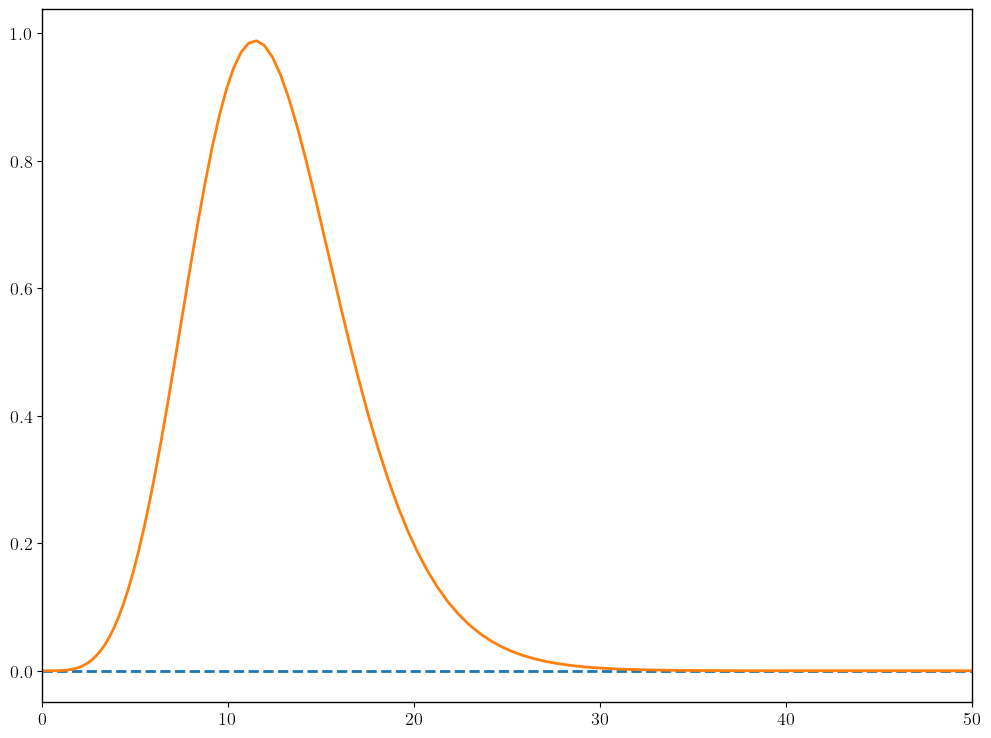

In [23]:
# Comprobando
plt.plot(rval, cte2*X3valores[0]*rval**2, ls='--')
plt.plot(rval, cte2*X3valores[1]*rval**4)
#plt.plot(rval, cte2*X3valores[2]*rval**5)

plt.xlim(0,50)

In [24]:
len(X2valores)

3

In [25]:
JJ = J
rval = r_dis2[1:Nptos]

# resolviendo
lam = Auto_Valores2[J][autoV]
rmin, rmax = rval[0], rval[-1]
arg = [JJ, lam, ell2, fsN, fuN]

rspan = np.linspace(rmin, rmax, 10000)

U0 = np.concatenate((np.array(X1valores)[:,0],
                np.array(X2valores)[:,0],
                np.array(X3valores)[:,0],
                BoundY10,
                BoundY2,
                BoundY3)) 
#[x11, x12, x13, x14,
# x21, x22, x23, x24,
# x31, x32, x33, x34,
# y11, y12, y13, y14,
# y21, y22, y23, y24,
#y31, y32, y33, y34]

sol_ = solve_ivp(ru.Syst, [rmin, rmax], U0, args=([arg]), t_eval=rspan,
                 method='DOP853', rtol=1e-8, atol=1e-12)  # DOP853 RK45

In [26]:
# extrayendo datos
datosR2 = sol_.t
datosA2, datosB2 = [], []
c1 = len(Lval2)
for i in range(c1):
    Lvalor = Lval2[i]
    tempA = sol_.y[c1+i]*sol_.t**Lvalor
    tempB = sol_.y[2*c1+i]*sol_.t**Lvalor
    
    datosA2.append(tempA)
    datosB2.append(tempB)

In [27]:
Lval2, c1

(array([1, 3, 5]), 3)

(-0.2, 0.15)

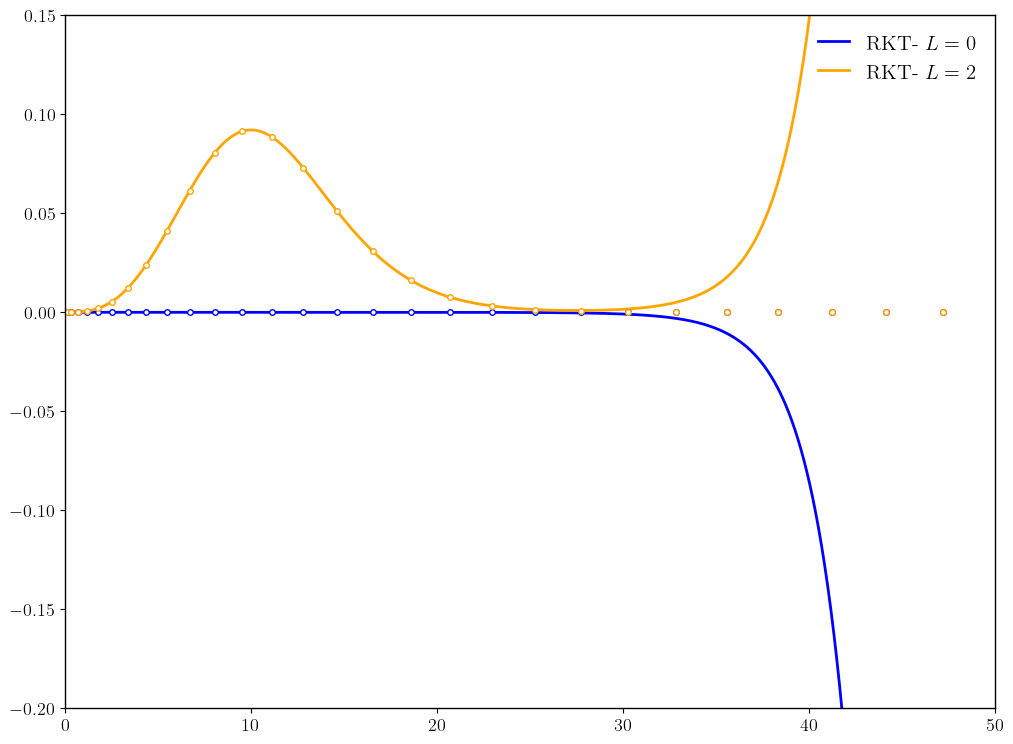

In [28]:
plt.plot(sol_.t, np.real(sol_.y[6]*cte2)*sol_.t**1, '-', color = 'blue',
               label = r'RKT- $L=0$')
plt.plot(sol_.t, np.real(sol_.y[7]*cte2)*sol_.t**3, '-', color = 'orange',
               label = r'RKT- $L=2$')
#plt.plot(sol_.t, np.real(sol_.y[5]*cte2)*sol_.t**5, '-', color = 'red',
#               label = r'RKT- $L=4$')


plt.plot(r_dis2[1:Nptos:4], np.real(datB2[0]*cte2)[::4], ls='',
         marker='o', markersize=4, c='blue', mfc='white')
plt.plot(r_dis2[1:Nptos:4], np.real(datB2[1]*cte2)[::4], ls='',
         marker='o', markersize=4, c='orange', mfc='white')
#plt.plot(r_dis2[1:Nptos:4], np.real(datB2[2]*cte2)[::4], ls='',
#         marker='o', markersize=4, c='red', mfc='white')

plt.legend(frameon=False)

plt.xlim(0, 50)
plt.ylim(-0.2, 0.15)

In [29]:
#plot

In [30]:
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.lines import Line2D

class HandlerDashedLines(HandlerLineCollection):
    """
    Custom Handler for LineCollection instances.
    """
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        leglines = []
        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        ydata = np.full_like(xdata, height / (numlines + 1))
        # for each line, create the line at the proper location
        # and set the dash pattern
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            # set color, dash pattern, and linewidth to that
            # of the lines in linecollection
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[1] is not None:
                legline.set_dashes(dashes[1])
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        return leglines
    
    
from matplotlib import cm  # ticker,
from matplotlib import colors

In [31]:
len(datosR), len(datosA), len(datosR2)

(10000, 3, 10000)

In [32]:
Lval, Lval2

(array([0, 2, 4]), array([1, 3, 5]))

Text(1, 0.11, '$\\lambda_R=0.0000008\\, N^2/t_c$')

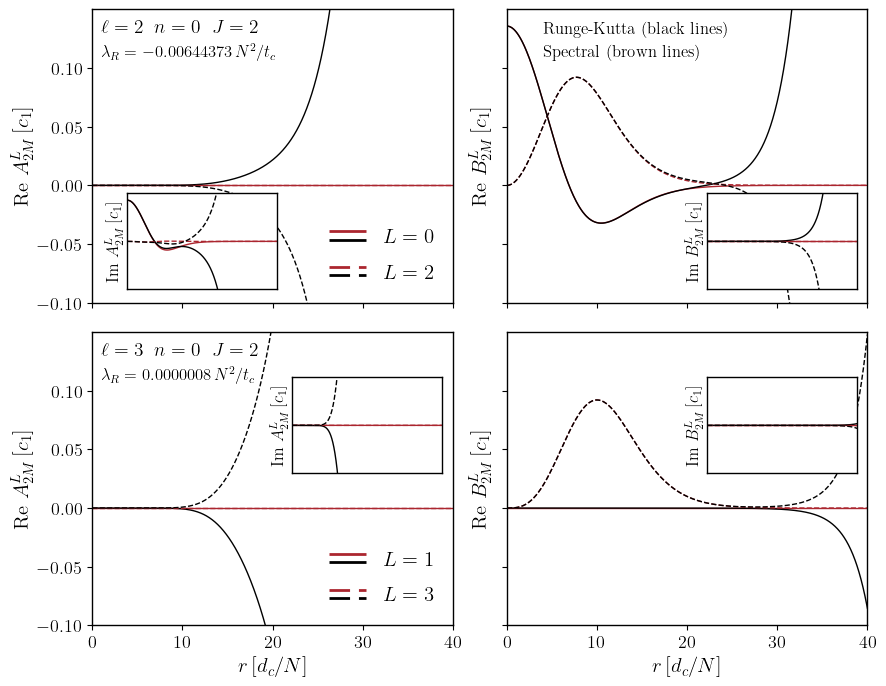

In [33]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']
Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8.),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.15))

##############
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

left, bottom, width, height = [0.16, 0.53, 0.15, 0.12]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.53, 0.15, 0.12]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[0][0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[0][1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])
    
    #
    ax[0][0].plot(datosR, np.real(datosA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax1.plot(datosR, np.imag(datosA[i]*cte),  ls=Ls[i], lw=1, 
             c='black')
    
    ax[0][1].plot(datosR, np.real(datosB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax2.plot(datosR, np.imag(datosB[i]*cte), ls=Ls[i], lw=1, 
             c='black')

#ax[0][1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
#           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

# ax[0][0].set_xlabel(r'$r \, [d_c]$')
# ax[0][1].set_xlabel(r'$r \, [d_c]$')
ax[0][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[0][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[0][0].set_xlim(0, 40)
ax[0][1].set_xlim(0, 40)
ax1.set_xlim(0, 40)
ax2.set_xlim(0, 40)

ax[0][0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0][0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

#ax[0][0].legend(frameon=False)
# ax[0][1].legend(frameon=False)


styles1 = ['solid', 'solid']
styles2 = ['dashed', 'dashed']
#styles3 = ['dotted', 'dotted']
colors = [col[3], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[0][0].legend([lc1, lc2], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

#ax[0][1].legend([lc1, lc2, lc3], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1]), r'$L = %d$'%(Lval[2])],
#             handler_map={type(lc1): HandlerDashedLines()},
#          handlelength=1.8, handleheight=1.5, frameon=False)

ax[0][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell, nodos, J), fontsize=14)
ax[0][0].text(x=1, y= 0.11, s=r'$\lambda_R=%9.8f \, N^2/t_c$'%np.real(Auto_Valores[J][2]),
              fontsize=12)

ax[0][1].text(x=4, y= 0.13, s=r'Runge-Kutta (black lines)', fontsize=12)
ax[0][1].text(x=4, y= 0.11, s=r'Spectral (brown lines)', fontsize=12)

######

##############
ellPos = 1
cte = -fsN(r_dis2[1:Nptos]).max()/np.abs(datB2[ellPos]).max()

left, bottom, width, height = [0.325, 0.3, 0.15, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.3, 0.15, 0.12]
ax4 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[1][0].plot(r_dis2[1:Nptos], np.real(datA2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax3.plot(r_dis[1:Nptos], np.imag(datA2[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1][1].plot(r_dis2[1:Nptos], np.real(datB2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax4.plot(r_dis2[1:Nptos], np.imag(datB2[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])
    
    #
    ax[1][0].plot(datosR2, np.real(datosA2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax3.plot(datosR2, np.imag(datosA2[i]*cte),  ls=Ls[i], lw=1, 
             c='black')
    
    ax[1][1].plot(datosR2, np.real(datosB2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax4.plot(datosR2, np.imag(datosB2[i]*cte), ls=Ls[i], lw=1, 
             c='black')


ax[1][0].set_xlabel(r'$r \, [d_c/N]$')
ax[1][1].set_xlabel(r'$r \, [d_c/N]$')
ax[1][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax3.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax4.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[1][0].set_xlim(0, 40)
ax[1][1].set_xlim(0, 40)
ax3.set_xlim(0, 40)
ax4.set_xlim(0, 40)

ax3.set_ylim(-0.1, 0.1)
ax4.set_ylim(-0.1, 0.1)

ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])


styles1 = ['solid', 'solid']
styles2 = ['dashed', 'dashed']
#styles3 = ['dotted', 'dotted']
colors = [col[3], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[1][0].legend([lc1, lc2], [r'$L = %d$'%(Lval2[0]), r'$L = %d$'%(Lval2[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

ax[1][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell2, nodos, J), fontsize=14)
ax[1][0].text(x=1, y= 0.11, s=r'$\lambda_R=%8.7f\, N^2/t_c$'%np.real(Auto_Valores2[J][autoV]),
              fontsize=12)


Text(1, 0.11, '$\\lambda_R=0.0000008\\, N^2/t_c$')

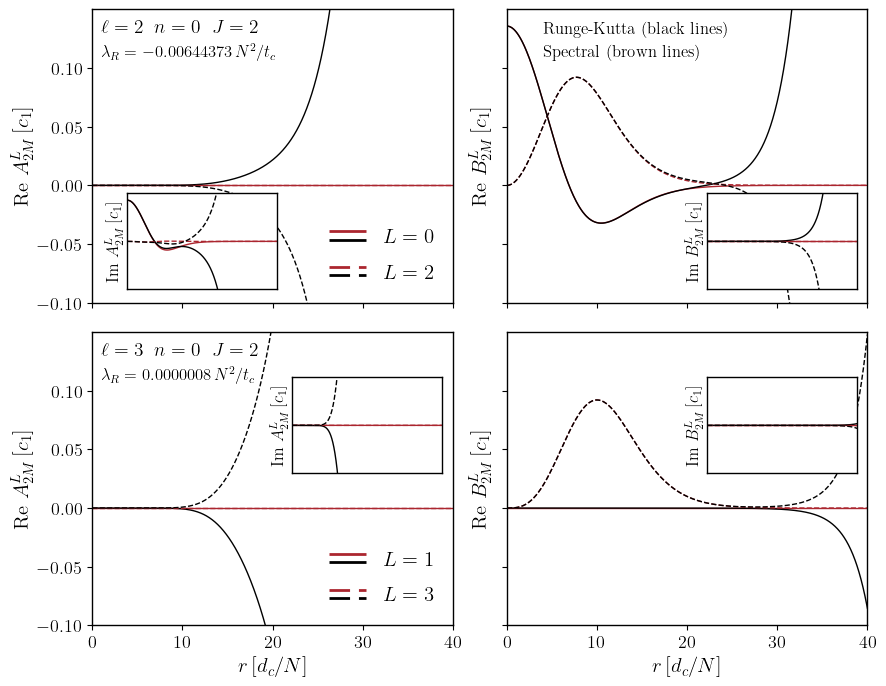

In [34]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']
Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8.),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.15))

##############
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

left, bottom, width, height = [0.16, 0.53, 0.15, 0.12]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.53, 0.15, 0.12]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[0][0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[0][1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])
    
    #
    ax[0][0].plot(datosR, np.real(datosA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax1.plot(datosR, np.imag(datosA[i]*cte),  ls=Ls[i], lw=1, 
             c='black')
    
    ax[0][1].plot(datosR, np.real(datosB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax2.plot(datosR, np.imag(datosB[i]*cte), ls=Ls[i], lw=1, 
             c='black')

#ax[0][1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
#           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

# ax[0][0].set_xlabel(r'$r \, [d_c]$')
# ax[0][1].set_xlabel(r'$r \, [d_c]$')
ax[0][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[0][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[0][0].set_xlim(0, 40)
ax[0][1].set_xlim(0, 40)
ax1.set_xlim(0, 40)
ax2.set_xlim(0, 40)

ax[0][0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0][0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

#ax[0][0].legend(frameon=False)
# ax[0][1].legend(frameon=False)


styles1 = ['solid', 'solid']
styles2 = ['dashed', 'dashed']
#styles3 = ['dotted', 'dotted']
colors = [col[3], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[0][0].legend([lc1, lc2], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

#ax[0][1].legend([lc1, lc2, lc3], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1]), r'$L = %d$'%(Lval[2])],
#             handler_map={type(lc1): HandlerDashedLines()},
#          handlelength=1.8, handleheight=1.5, frameon=False)

ax[0][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell, nodos, J), fontsize=14)
ax[0][0].text(x=1, y= 0.11, s=r'$\lambda_R=%9.8f \, N^2/t_c$'%np.real(Auto_Valores[J][2]),
              fontsize=12)

ax[0][1].text(x=4, y= 0.13, s=r'Runge-Kutta (black lines)', fontsize=12)
ax[0][1].text(x=4, y= 0.11, s=r'Spectral (brown lines)', fontsize=12)

######

##############
ellPos = 1
cte = -fsN(r_dis2[1:Nptos]).max()/np.abs(datB2[ellPos]).max()

left, bottom, width, height = [0.325, 0.3, 0.15, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.3, 0.15, 0.12]
ax4 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[1][0].plot(r_dis2[1:Nptos], np.real(datA2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax3.plot(r_dis[1:Nptos], np.imag(datA2[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1][1].plot(r_dis2[1:Nptos], np.real(datB2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax4.plot(r_dis2[1:Nptos], np.imag(datB2[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])
    
    #
    ax[1][0].plot(datosR2, np.real(datosA2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax3.plot(datosR2, np.imag(datosA2[i]*cte),  ls=Ls[i], lw=1, 
             c='black')
    
    ax[1][1].plot(datosR2, np.real(datosB2[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax4.plot(datosR2, np.imag(datosB2[i]*cte), ls=Ls[i], lw=1, 
             c='black')


ax[1][0].set_xlabel(r'$r \, [d_c/N]$')
ax[1][1].set_xlabel(r'$r \, [d_c/N]$')
ax[1][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax3.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax4.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[1][0].set_xlim(0, 40)
ax[1][1].set_xlim(0, 40)
ax3.set_xlim(0, 40)
ax4.set_xlim(0, 40)

ax3.set_ylim(-0.1, 0.1)
ax4.set_ylim(-0.1, 0.1)

ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])


styles1 = ['solid', 'solid']
styles2 = ['dashed', 'dashed']
#styles3 = ['dotted', 'dotted']
colors = [col[3], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[1][0].legend([lc1, lc2], [r'$L = %d$'%(Lval2[0]), r'$L = %d$'%(Lval2[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

ax[1][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell2, nodos, J), fontsize=14)
ax[1][0].text(x=1, y= 0.11, s=r'$\lambda_R=%8.7f\, N^2/t_c$'%np.real(Auto_Valores2[J][autoV]),
              fontsize=12)


In [35]:
fig.savefig('RK.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight' # Plot will be occupy a maximum of available space # bbox_inches=None,
       )

Text(1, 0.11, '$\\lambda_R=7.99\\times10^{-7}\\, N^2/t_c$')

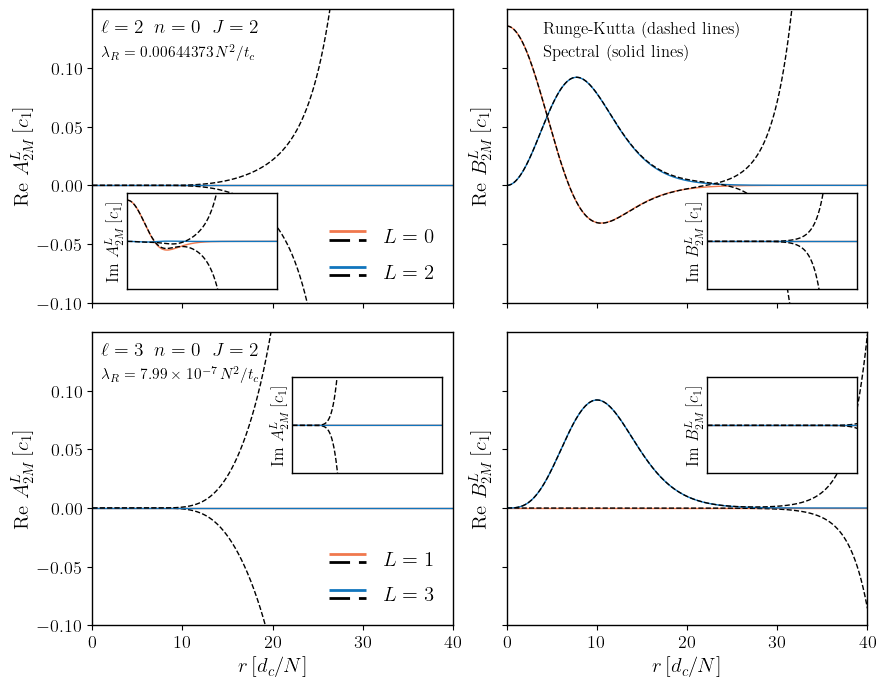

In [54]:
#col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
#      '#f0a092', '#484f07', '#694d0c', '#1175bd']

col = [ '#f0784d', '#1175bd']
Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8.),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.15))

##############
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

left, bottom, width, height = [0.16, 0.53, 0.15, 0.12]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.53, 0.15, 0.12]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[0][0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[0], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[i])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte), ls=Ls[0], lw=1, 
             c=col[i])

    ax[0][1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[0], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[i])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[0], lw=1, 
             c=col[i])
    
    #
    ax[0][0].plot(datosR, np.real(datosA[i]*cte), ls=Ls[1], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax1.plot(datosR, np.imag(datosA[i]*cte), ls=Ls[1], lw=1, 
             c='black')
    
    ax[0][1].plot(datosR, np.real(datosB[i]*cte), ls=Ls[1], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax2.plot(datosR, np.imag(datosB[i]*cte), ls=Ls[1], lw=1, 
             c='black')

#ax[0][1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
#           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

# ax[0][0].set_xlabel(r'$r \, [d_c]$')
# ax[0][1].set_xlabel(r'$r \, [d_c]$')
ax[0][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[0][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[0][0].set_xlim(0, 40)
ax[0][1].set_xlim(0, 40)
ax1.set_xlim(0, 40)
ax2.set_xlim(0, 40)

ax[0][0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0][0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

#ax[0][0].legend(frameon=False)
# ax[0][1].legend(frameon=False)


styles1 = ['solid', 'dashed']
styles2 = ['solid', 'dashed']
#styles3 = ['dotted', 'dotted']
colors1 = [col[0], 'black']
colors2 = [col[1], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors1)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors2)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[0][0].legend([lc1, lc2], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

#ax[0][1].legend([lc1, lc2, lc3], [r'$L = %d$'%(Lval[0]), r'$L = %d$'%(Lval[1]), r'$L = %d$'%(Lval[2])],
#             handler_map={type(lc1): HandlerDashedLines()},
#          handlelength=1.8, handleheight=1.5, frameon=False)

ax[0][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell, nodos, J), fontsize=14)
ax[0][0].text(x=1, y= 0.11, s=r'$\lambda_R=%9.8f \, N^2/t_c$'%np.real(-Auto_Valores[J][2]),
              fontsize=11)

ax[0][1].text(x=4, y= 0.13, s=r'Runge-Kutta (dashed lines)', fontsize=12)
ax[0][1].text(x=4, y= 0.11, s=r'Spectral (solid lines)', fontsize=12)

######

##############
ellPos = 1
cte = -fsN(r_dis2[1:Nptos]).max()/np.abs(datB2[ellPos]).max()

left, bottom, width, height = [0.325, 0.3, 0.15, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.74, 0.3, 0.15, 0.12]
ax4 = fig.add_axes([left, bottom, width, height])

for i in range(c1-1):
    ax[1][0].plot(r_dis2[1:Nptos], np.real(datA2[i]*cte), ls=Ls[0], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[i])
    ax3.plot(r_dis[1:Nptos], np.imag(datA2[i]*cte),  ls=Ls[0], lw=1, 
             c=col[i])

    ax[1][1].plot(r_dis2[1:Nptos], np.real(datB2[i]*cte), ls=Ls[0], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[i])
    ax4.plot(r_dis2[1:Nptos], np.imag(datB2[i]*cte), ls=Ls[0], lw=1, 
             c=col[i])
    
    #
    ax[1][0].plot(datosR2, np.real(datosA2[i]*cte), ls=Ls[1], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax3.plot(datosR2, np.imag(datosA2[i]*cte),  ls=Ls[1], lw=1, 
             c='black')
    
    ax[1][1].plot(datosR2, np.real(datosB2[i]*cte), ls=Ls[1], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c='black')
    ax4.plot(datosR2, np.imag(datosB2[i]*cte), ls=Ls[1], lw=1, 
             c='black')


ax[1][0].set_xlabel(r'$r \, [d_c/N]$')
ax[1][1].set_xlabel(r'$r \, [d_c/N]$')
ax[1][0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1][1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax3.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, fontsize=12)  # labelpad=-5,
ax4.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, fontsize=12)

ax[1][0].set_xlim(0, 40)
ax[1][1].set_xlim(0, 40)
ax3.set_xlim(0, 40)
ax4.set_xlim(0, 40)

ax3.set_ylim(-0.1, 0.1)
ax4.set_ylim(-0.1, 0.1)

ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])


styles1 = ['solid', 'dashed']
styles2 = ['solid', 'dashed']
#styles3 = ['dotted', 'dotted']
colors1 = [col[0], 'black']
colors2 = [col[1], 'black']
line = [[(0, 0)]]
lc1 = mcol.LineCollection(2*line, linestyles=styles1, colors=colors1)
lc2 = mcol.LineCollection(2*line, linestyles=styles2, colors=colors2)
#lc3 = mcol.LineCollection(2*line, linestyles=styles3, colors=colors)

ax[1][0].legend([lc1, lc2], [r'$L = %d$'%(Lval2[0]), r'$L = %d$'%(Lval2[1])],#, r'$L = %d$'%(Lval[2])],
             handler_map={type(lc1): HandlerDashedLines()},
          handlelength=1.8, handleheight=1.5, frameon=False, loc='lower right')

ax[1][0].text(x=1, y= 0.13, s=r'$\ell=%d \;\; n=%d \;\; J=%d$'%(ell2, nodos, J), fontsize=14)
ax[1][0].text(x=1, y= 0.11, s=r'$\lambda_R=7.99\times10^{-7}\, N^2/t_c$',#r'$\lambda_R=%8.7f\, N^2/t_c$'%np.real(Auto_Valores2[J][autoV]),
              fontsize=11)

In [55]:
fig.savefig('RK.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight' # Plot will be occupy a maximum of available space # bbox_inches=None,
       )